# Projet Neural Network - IA


In [160]:
import pandas as pd

filepath = "../data/digester_data.csv"
dataset = pd.read_csv(filepath, index_col=0, parse_dates=True)
dataset.describe()

,Wash Filtrate to Digester - Total Flow,Wash Filtrate Vertical Nozzle,White Liquor Flow to ITC,H-factor,H-factor Co-Current,H-factor Target,H-factor Counter-Current,Volumetric Chip Flow,Chip Mass Flow from Piles,Spruce Saw Mill Chips Share,...,Hot Spent Digester Liquor Specific Flow to Impregnation Vessel,Digester Production,Digester Long Level,Digester Chip Level Control,Digester Dilution Factor,Digester Short Level,Blow Kappa,Blow Temperature,Blow Production,Weak Black Liquor to Evaporation Plant Residual Alkali
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,...,5968.000000,5.968000e+03,5968.000000,5.968000e+03,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,152.684728,136.377225,0.805236,570.977032,301.579641,570.424631,269.397390,648.486237,36.875105,8.321328,...,2.699426,1.131095e+03,88.548976,1.821106e+01,2.180605,48.323078,27.805850,87.668116,1192.618513,10.258447
std,16.048149,13.919758,0.065796,44.603387,23.764770,42.663694,23.083611,151.769241,4.564046,13.778885,...,0.024933,9.648935e+01,0.389135,1.198734e+01,0.077165,0.930924,1.542807,1.430514,110.261327,0.886624
min,74.308880,67.062810,0.247412,481.332200,238.832000,510.000000,218.241900,0.287224,0.000000,0.000000,...,1.557932,2.920000e-24,85.750780,8.270000e-44,0.562290,38.517540,22.170250,78.215330,617.716000,8.920000
25%,150.227000,134.500125,0.812160,533.705400,281.981575,530.000000,251.153225,657.000750,34.966920,0.000000,...,2.700000,1.159972e+03,88.269143,9.788168e+00,2.112270,47.825635,26.894120,86.934745,1173.334500,9.410000
50%,155.692000,139.346850,0.821603,559.434800,293.838550,550.000000,265.667550,690.155350,37.225650,0.000000,...,2.700000,1.164592e+03,88.548210,1.743239e+01,2.192728,48.213135,27.760630,87.685415,1214.454500,10.190000
75%,161.757025,143.924075,0.833718,609.275650,321.322500,600.000000,287.128975,711.669425,40.014853,14.973385,...,2.700000,1.165070e+03,88.808513,2.506831e+01,2.244194,48.771113,28.699717,88.671003,1251.014500,11.080000
max,190.484000,170.756900,0.912871,732.269400,376.860700,670.000000,364.774900,865.293400,48.994150,50.678790,...,2.800951,1.195267e+03,93.199450,1.015897e+02,2.727024,66.054000,33.682950,90.681490,1500.449000,11.370000


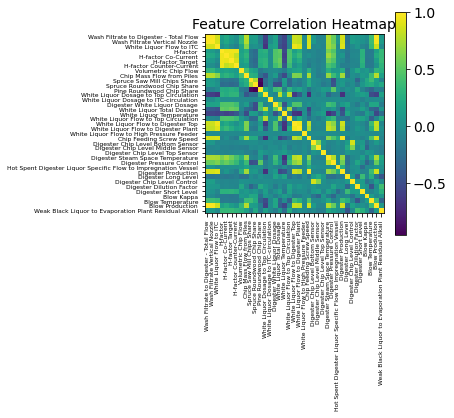

In [172]:
plt.matshow(dataset.corr())
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=6, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=6)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [161]:
y_data = dataset['Blow Kappa'].to_numpy()
X_data = dataset.drop(['Blow Kappa'], axis=1).to_numpy()
print(y_data.shape)
print(X_data.shape)

(5968,)
(5968, 36)


In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)


In [163]:
#Split des données en train et test

y_train = y_data[:int(len(y_data)*0.8)]
y_test = y_data[int(len(y_data)*0.8):]
X_train = X_data[:int(len(X_data)*0.8)]
X_test = X_data[int(len(X_data)*0.8):]

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)


(4774,) (1194,)
(4774, 36) (1194, 36)


In [164]:
import keras
import tensorflow as tf

batch_size = 64
step = 1
sequence_length = 30

dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [165]:
for batch in dataset_train.take(1):
    inputs, targets = batch

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
hiden_layer_1 = keras.layers.LSTM(64)(inputs)
hiden_layer_2 = keras.layers.Dense(32, activation="relu")(hiden_layer_1)
hiden_layer_3 = keras.layers.Dense(16, activation="relu")(hiden_layer_2)
hiden_layer_4 = keras.layers.Dense(8, activation="relu")(hiden_layer_3)
hiden_layer_5 = keras.layers.Dense(4, activation="relu")(hiden_layer_4)
hiden_layer_6 = keras.layers.Dense(2, activation="relu")(hiden_layer_5)
outputs = keras.layers.Dense(1)(hiden_layer_6)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 30, 36)]          0         
                                                                 
 lstm_27 (LSTM)              (None, 64)                25856     
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_88 (Dense)            (None, 16)                528       
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 dense_90 (Dense)            (None, 4)                 36        
                                                                 
 dense_91 (Dense)            (None, 2)                 10 

In [166]:

model.compile(
    optimizer='RMSprop',
    loss='mse',
    metrics=['mse'],
)

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_test, 
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/10
73/75 [============================>.] - ETA: 0s - loss: 389.2125 - mse: 389.2125
Epoch 1: val_loss improved from inf to 224.63184, saving model to model_checkpoint.h5
75/75 [==============================] - 6s 43ms/step - loss: 383.2423 - mse: 383.2423 - val_loss: 224.6318 - val_mse: 224.6318
Epoch 2/10
75/75 [==============================] - ETA: 0s - loss: 120.2710 - mse: 120.2710
Epoch 2: val_loss improved from 224.63184 to 110.59634, saving model to model_checkpoint.h5
75/75 [==============================] - 3s 39ms/step - loss: 120.2710 - mse: 120.2710 - val_loss: 110.5963 - val_mse: 110.5963
Epoch 3/10
73/75 [============================>.] - ETA: 0s - loss: 32.3951 - mse: 32.3951
Epoch 3: val_loss improved from 110.59634 to 60.43175, saving model to model_checkpoint.h5
75/75 [==============================] - 3s 35ms/step - loss: 31.9691 - mse: 31.9691 - val_loss: 60.4317 - val_mse: 60.4317
Epoch 4/10
74/75 [============================>.] - ETA: 0s - loss: 4.4423

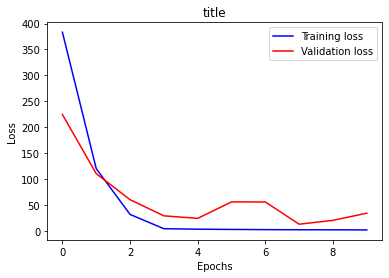

In [167]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("title")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


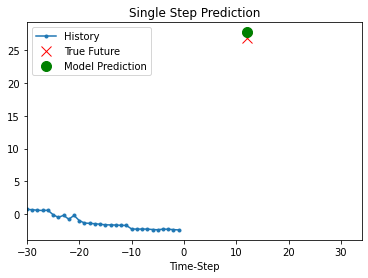

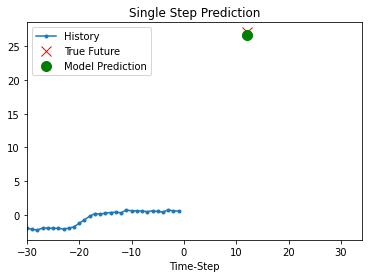

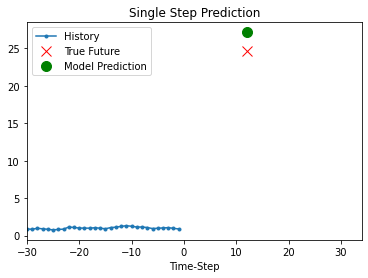

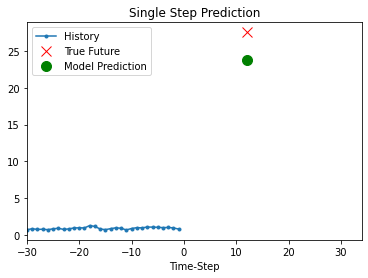

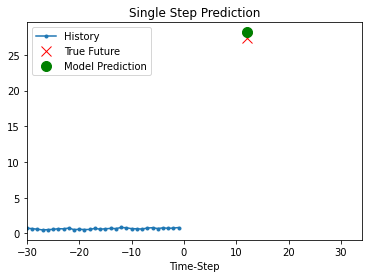

In [168]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i],
                     markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(
            ), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_test.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )
